# 6.3 Mini-project: Applying supervised learning to predict student dropout

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

You will work with the data in three distinct stages:

1.  Applicant and course information
2.  Student and engagement data
3.  Academic performance data

These stages reflect Study Group’s real-world data journey and how student information has progressed and become available. Additionally, this approach enables you, through data exploration, to support Study Group in better understanding and identifying key metrics to monitor. This approach will also assist you in determining at which stage of the student journey interventions would be most effective.

Please set aside approximately **12 hours** to complete the mini-project.

## Business context
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment.

Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided you with 3 data sets.


## Objective
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms, such as XGBoost, and a neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data sets, taking a phased approach
- preprocess the data and conduct feature engineering
- predict the dropout rate using XGBoost, and a neural network-based model.

You will also write a report summarising the results of your findings and recommendations.

## Assessment criteria
By completing this project, you’ll be able to provide evidence that you can:

- develop accurate predictions across diverse organisational scenarios by building and testing advanced ML models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

## Project guidance
1.   Navigate to **Mini-project 6.3 Applying supervised learning to predict student dropout**, and save a copy of the activity Notebook to your Drive.

2. Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

3. When you’ve completed the activity:
  - download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file
  - save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.

4. Prepare a detailed report (800–1,000 words) that includes an overview of your approach, a description of your analysis, and an explanation of the insights you identified - Please refer to the Rubric for further details that should form a part of your analysis and report. Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_W6_Mini-project.pdf**.

5. Submit your Notebook and PDF document.




# Stage 1 data

I. Data pre-processing

In [1]:
# File URL
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"

**Stage 1: Pre-processing instructions**
- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with > 50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.

In [2]:
# Start coding from here with Stage 1 dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import xgboost as xgb
import seaborn as sns

df = pd.read_csv(file_url)


In [3]:
print(df.shape)
print(df.head())
df.info()
# Count the number of missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)

(25059, 16)
     CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nan


Remove any columns not useful in the analysis (LearnerCode).

Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).

Remove columns with > 50% data missing.

In [4]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime

df["DateofBirth"] = pd.to_datetime(df["DateofBirth"], dayfirst=True)
df["Age"] = datetime.today().year - df["DateofBirth"].dt.year
df["Age"] = df["Age"].astype(int)  # Convert to integer
df.drop(columns=["DateofBirth"], inplace=True)


###  Remove Unnecessary Columns ###
df.drop(columns=["LearnerCode"], inplace=True)

### Remove High-Cardinality Columns ###
high_cardinality_cols = [col for col in df.select_dtypes(include=["object"]).columns
                         if df[col].nunique() > 200]
df.drop(columns=high_cardinality_cols, inplace=True)

### Remove Columns with > 50% Missing Data ###
missing_threshold = 0.5 * len(df)  # 50% of total rows around 12529.5 rows
df.dropna(thresh=missing_threshold, axis=1, inplace=True)

print(df.shape)
print(df.head())


(25059, 11)
     CentreName BookingType              LeadSource Gender Nationality  \
0  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
1  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
2  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
3  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
4  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   

              CourseLevel                                         CourseName  \
0             Pre-Masters                       Business and Law Pre-Masters   
1              Foundation   Life Sciences Undergraduate Foundation Programme   
2  International Year Two  Business Management and Finance International ...   
3  International Year Two  Business Management and Finance International ...   
4             Pre-Masters                       Business and Law Pre-Masters   

   IsFirstIntake CompletedCourse   ProgressionUniversity  Age 

Five columns have been erased during pre-processing.

Convert the target variable from string to binary encoding.

Perform ordinal encoding for
ordinal data.

Perform one-hot encoding for all other categorical data.

In [5]:
#### 'CompletedCourse' is the target#### change to integer values
df["CompletedCourse"] = df["CompletedCourse"].map({"Yes": 1, "No": 0})
#### check unique values for Course level
print(df["CourseLevel"].unique())

['Pre-Masters' 'Foundation' 'International Year Two'
 'International Year One']


In [6]:
### convert IsFirstIntake to integer
df["IsFirstIntake"] = df["IsFirstIntake"].astype(int)

In [7]:
###  Transform Course level to ordinal data and encode it ###
ordinal_features = ["CourseLevel"]
ordinal_mapping = {"Foundation": 1, "International Year One": 2,
                   "International Year Two": 3, "Pre-Masters": 4}
df["CourseLevel"] = df["CourseLevel"].map(ordinal_mapping)



In [8]:
###  Convert Gender to 0 (Male) and 1 (Female) ###
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})



In [9]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CentreName             25059 non-null  object
 1   BookingType            25059 non-null  object
 2   LeadSource             25059 non-null  object
 3   Gender                 25059 non-null  int64 
 4   Nationality            25059 non-null  object
 5   CourseLevel            25059 non-null  int64 
 6   CourseName             25059 non-null  object
 7   IsFirstIntake          25059 non-null  int64 
 8   CompletedCourse        25059 non-null  int64 
 9   ProgressionUniversity  25059 non-null  object
 10  Age                    25059 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 2.1+ MB
     CentreName BookingType              LeadSource  Gender Nationality  \
0  ISC_Aberdeen       Agent  Standard Agent Booking       0     Chinese   
1  ISC_Aberdeen       Agent 

In [10]:
### One-Hot Encoding for Remaining Categorical Features ###
categorical_columns = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_columns)

# Display the transformed dataset shape
print(f"New shape: {df.shape}")
print(df.head())


New shape: (25059, 396)
   Gender  CourseLevel  IsFirstIntake  CompletedCourse  Age  \
0       0            4              1                1   27   
1       0            1              0                1   27   
2       0            3              0                1   25   
3       0            3              1                1   26   
4       0            4              1                1   29   

   CentreName_ISC_Aberdeen  CentreName_ISC_Cardiff  CentreName_ISC_Dublin  \
0                     True                   False                  False   
1                     True                   False                  False   
2                     True                   False                  False   
3                     True                   False                  False   
4                     True                   False                  False   

   CentreName_ISC_Durham  CentreName_ISC_Holland  ...  \
0                  False                   False  ...   
1                  F

Check for the target variable histogram

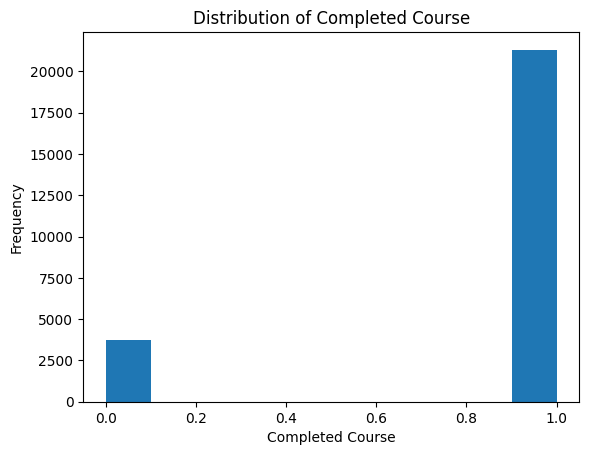

CompletedCourse
1    21305
0     3754
Name: count, dtype: int64


In [ ]:
# Plot the histogram
plt.hist(df['CompletedCourse'])
plt.xlabel('Completed Course')
plt.ylabel('Frequency')
plt.title('Distribution of Completed Course')
plt.show()

## Count completed course values
print(df['CompletedCourse'].value_counts())

The data is clearly imbalanced with over 5.5 more individuals that completed their respective course.

In a first instance we will try the xgboost algorithm without performing feature reduction and check how th model performs.

Split the data for xgboost and neural networks

In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score



# Define features and target
X = df.drop(columns=["CompletedCourse"])  # Features
y = df["CompletedCourse"]  # Target (Binary: 1 = Completed, 0 = Dropped Out)
X = X.astype(int)  # Converts all boolean columns to 0/1 integers so that the neural network will be able to handle the data set

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Initialise XGBOOST model with default parameters

XGBoost Model Accuracy: 0.8932561851556265

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.53      0.60       751
           1       0.92      0.96      0.94      4261

    accuracy                           0.89      5012
   macro avg       0.80      0.74      0.77      5012
weighted avg       0.89      0.89      0.89      5012

Accuracy: 0.8933
Confusion Matrix:
[[ 400  351]
 [ 184 4077]]
Precision: 0.9207
Recall: 0.9568
ROC-AUC Score: 0.8792


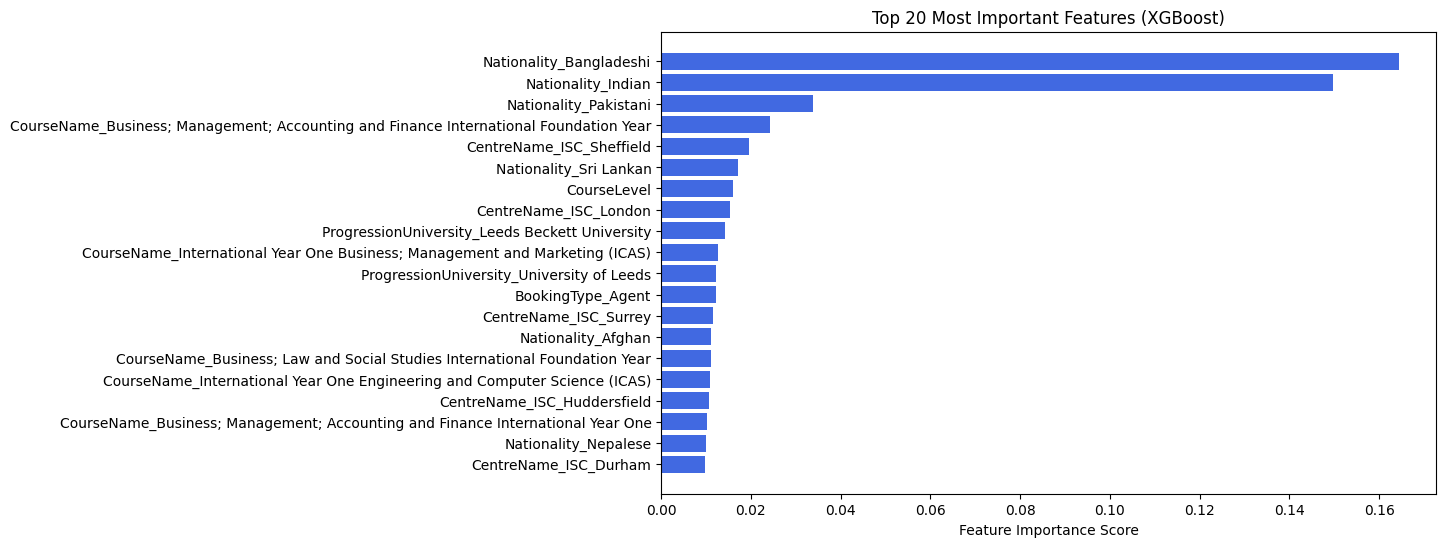

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
seed = 42
# Initialize XGBoost with default parameters
xg_model = xgb.XGBClassifier(random_state=seed)  # Add seed for reproducibility

# Train the model
xg_model.fit(X_train, y_train)

# Predictions
predictions = xg_model.predict(X_test)
# Make predictions
y_pred = xg_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)[:, 1]  # Get probability for ROC-AUC

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Model evaluation
print("XGBoost Model Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Feature Importance Analysis
import matplotlib.pyplot as plt

feature_importances = xg_model.feature_importances_
sorted_idx_1 = feature_importances.argsort()[-20:]  # Top 20 most important features

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx_1], feature_importances[sorted_idx_1], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.title("Top 20 Most Important Features (XGBoost)")
plt.show()


In [ ]:
print(f"Train Accuracy: {xg_model.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {xg_model.score(X_test, y_test):.4f}")

Train Accuracy: 0.9068
Test Accuracy: 0.8933


These are the default parameters of xgboost that were used in the previuous cell. n_estimators: 100
max_depth: 6
learning_rate: 0.1
reg_alpha: 0
reg_lambda: 1


In the next cell we will implement XGboost with 200 estimators and a learning rate of 0.05.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:28:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8949
Confusion Matrix:
[[ 384  367]
 [ 160 4101]]
Precision: 0.9179
Recall: 0.9625
ROC-AUC Score: 0.8790


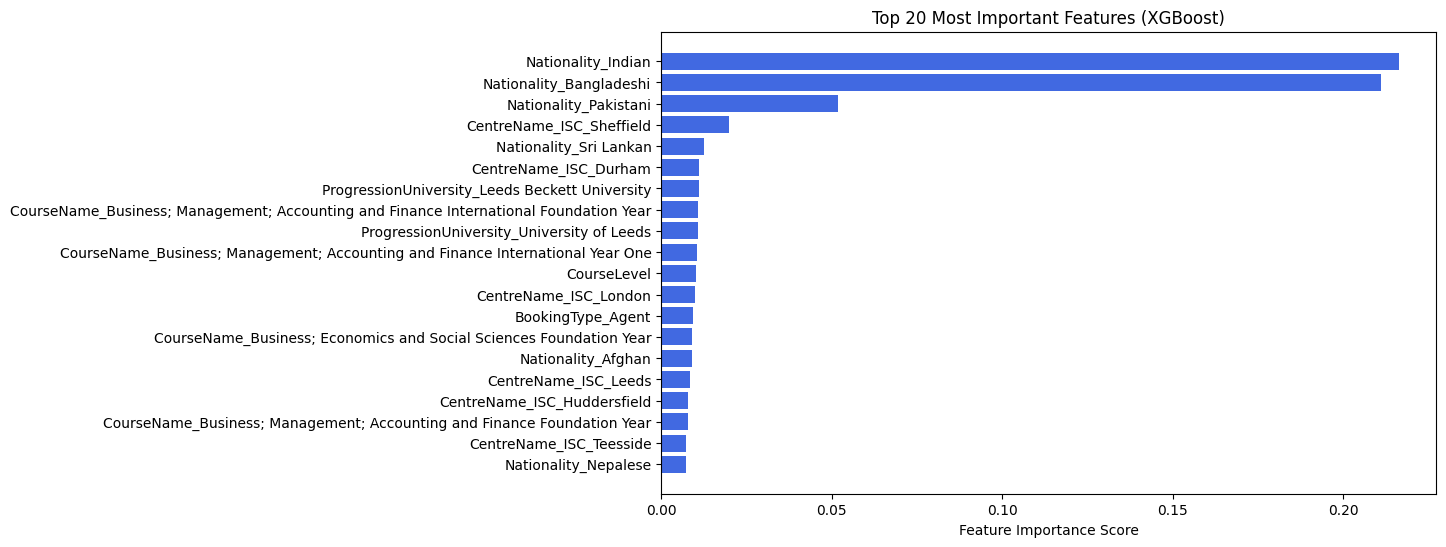

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,      # Number of trees
    learning_rate=0.05,    # Step size shrinkage
    max_depth=6,           # Depth of each tree
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"  # Since it's binary classification
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get probability for ROC-AUC

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Feature Importance Analysis
import matplotlib.pyplot as plt

feature_importances = xgb_model.feature_importances_
sorted_idx = feature_importances.argsort()[-20:]  # Top 20 most important features

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.title("Top 20 Most Important Features (XGBoost)")
plt.show()


In [ ]:
print(f"Train Accuracy: {xgb_model.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {xgb_model.score(X_test, y_test):.4f}")


Train Accuracy: 0.9027
Test Accuracy: 0.8949


In the next cell we performed we performed a grid search where we tried models with three sets of estimators (100, 200, 300), three sets of learning rates (0.01, 0.05, and 0.1), and four sets of max depth leaves (3, 4, 5, 6).

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],        # Number of trees
    "learning_rate": [0.01, 0.05, 0.1],     # Step size
    "max_depth": [3, 4, 6, 8],                 # Tree depth

}

# Create Grid Search
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    param_grid=param_grid,
    scoring="roc_auc",  # Optimize for AUC
    cv=3,               # 3-fold cross-validation
    verbose=2,
    n_jobs=-1           # Use all CPU cores
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}
Accuracy: 0.8955
ROC-AUC Score: 0.8796
Precision: 0.9190
Recall: 0.9617
Confusion Matrix:
[[ 390  361]
 [ 163 4098]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       751
           1       0.92      0.96      0.94      4261

    accuracy                           0.90      5012
   macro avg       0.81      0.74      0.77      5012
weighted avg       0.89      0.90      0.89      5012



The grid search determined that the best model had 300 estimators, a 0.05 learning rate, and a max depth of 6 leaves.

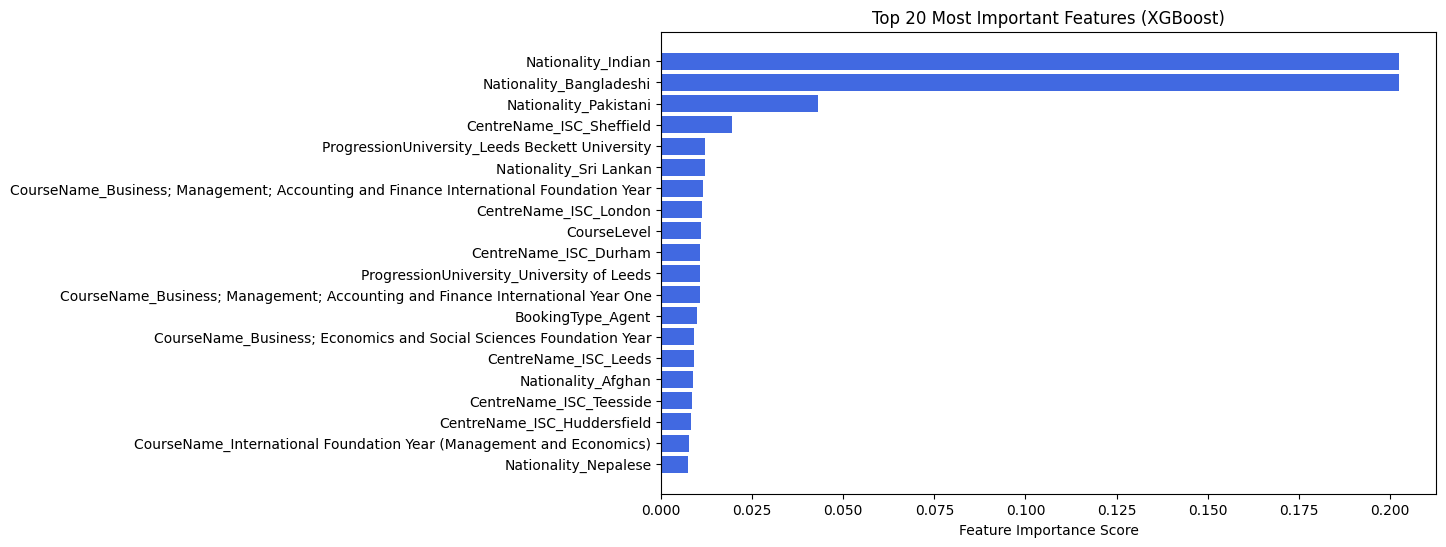

In [ ]:
# Feature Importance Analysis
import matplotlib.pyplot as plt

feature_importances = best_model.feature_importances_
sorted_idx_best = feature_importances.argsort()[-20:]  # Top 20 most important features

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx_best], feature_importances[sorted_idx_best], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.title("Top 20 Most Important Features (XGBoost)")
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt

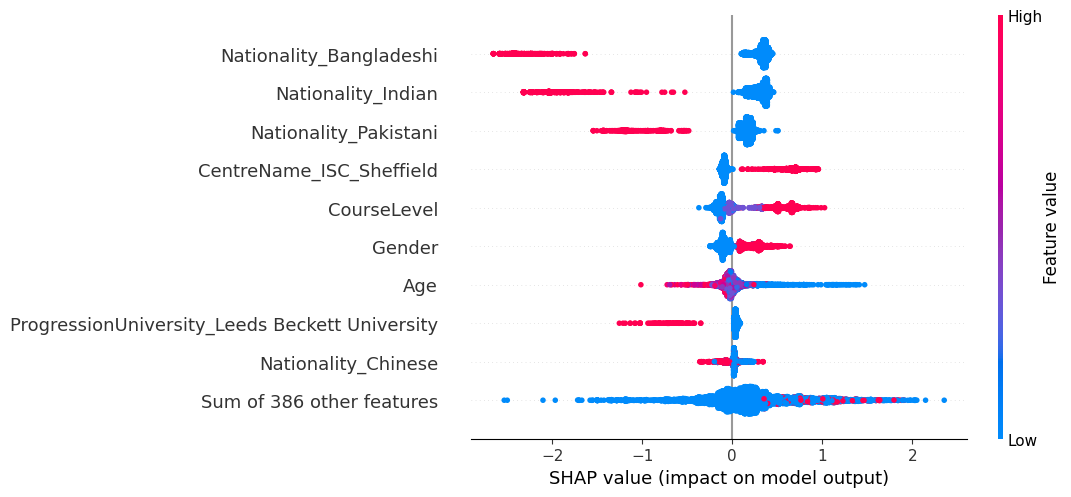

In [ ]:
shap_ex = shap.TreeExplainer(best_model)
vals = shap_ex(X_test)
shap.plots.beeswarm(vals)


The SHAP beeswarm plot provides a detailed view of feature importance by showing the magnitude and direction of each feature's impact on predictions. Additionally, it reveals feature interactions through the overlapping of SHAP values.

 The regular feature importance plot only displays absolute importance, while the SHAP plot highlights whether a feature increases or decreases the predicted outcome. This explains why some features, like course level and gender, appear lower in the regular plot. Furthermore, certain nationalities and center names seem highly important for predicting the target variable in both plots.

Neural network

In [ ]:
X.shape

(25059, 395)

In a first instance, we will create a straightforward neural network with one input layer, two hidden layers, and one output layer. Since the input has at least 395 features, this will be the number of neurons in the input layer. Then, we will reduce the number of neurons to 128 in the first hidden layer and reduce it by half in the next one. For the input and hidden layers, we will use the ReLU activation function, and for the output function, we will use the sigmoid function since it is a binary classification project. First, we will use the SGD optimizer.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(395,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8487 - loss: 0.4080 - val_accuracy: 0.8853 - val_loss: 0.2961
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8950 - loss: 0.2784 - val_accuracy: 0.8879 - val_loss: 0.2904
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8959 - loss: 0.2642 - val_accuracy: 0.8909 - val_loss: 0.2847
Epoch 4/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8979 - loss: 0.2639 - val_accuracy: 0.8917 - val_loss: 0.2854
Epoch 5/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8997 - loss: 0.2531 - val_accuracy: 0.8921 - val_loss: 0.2834
Epoch 6/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8979 - loss: 0.2592 - val_accuracy: 0.8931 - val_loss: 0.2848
Epoch 7/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8976 - loss: 0.2529 - val_accuracy: 0.8941 - val_loss: 0.2830
Epoch 8/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8989 - loss: 0.2509 - val_accuracy: 0.

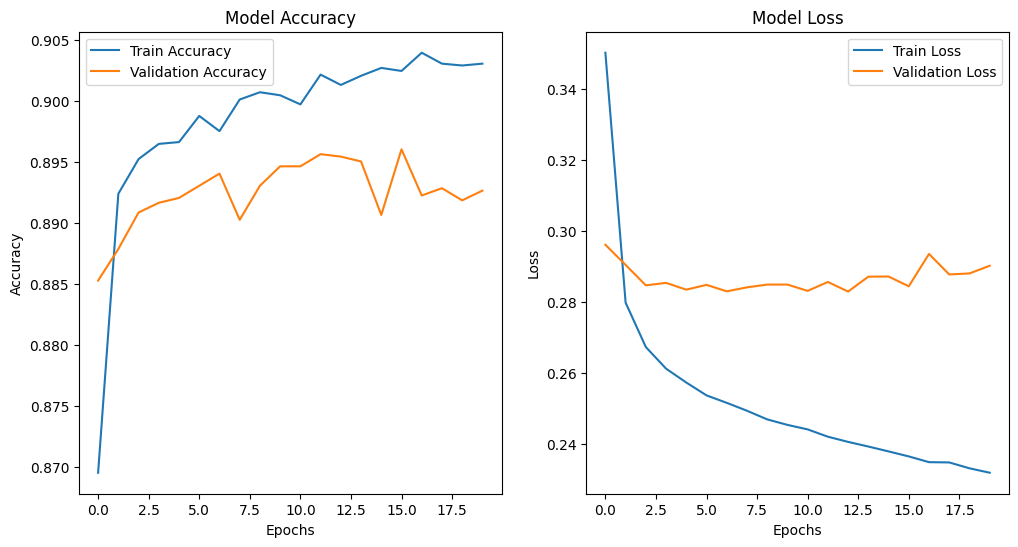

In [ ]:
import matplotlib.pyplot as plt
# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



The model already seems to have a good accuracy and  does not excessively overfit. We will try adding one hidden layer of 32 neurons.

In [ ]:
# Build the neural network
model_2 = Sequential([
    Dense(256, activation='relu', input_shape=(395,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model (Using SGD
model_2.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model_2
history_2 = model_2.fit(
    X_train_scaled, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

# Make predictions
y_pred = (model_2.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model_2
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8415 - loss: 0.4390 - val_accuracy: 0.8787 - val_loss: 0.3035
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8867 - loss: 0.2922 - val_accuracy: 0.8885 - val_loss: 0.2886
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8944 - loss: 0.2687 - val_accuracy: 0.8883 - val_loss: 0.2840
Epoch 4/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8941 - loss: 0.2616 - val_accuracy: 0.8939 - val_loss: 0.2796
Epoch 5/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8981 - loss: 0.2533 - val_accuracy: 0.8899 - val_loss: 0.2854
Epoch 6/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9010 - loss: 0.2477 - val_accuracy: 0.8931 - val_loss: 0.2805
Epoch 7/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8959 - loss: 0.2510 - val_accuracy: 0.8931 - val_loss: 0.2820
Epoch 8/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9032 - loss: 0.2446 - val_accuracy: 0.

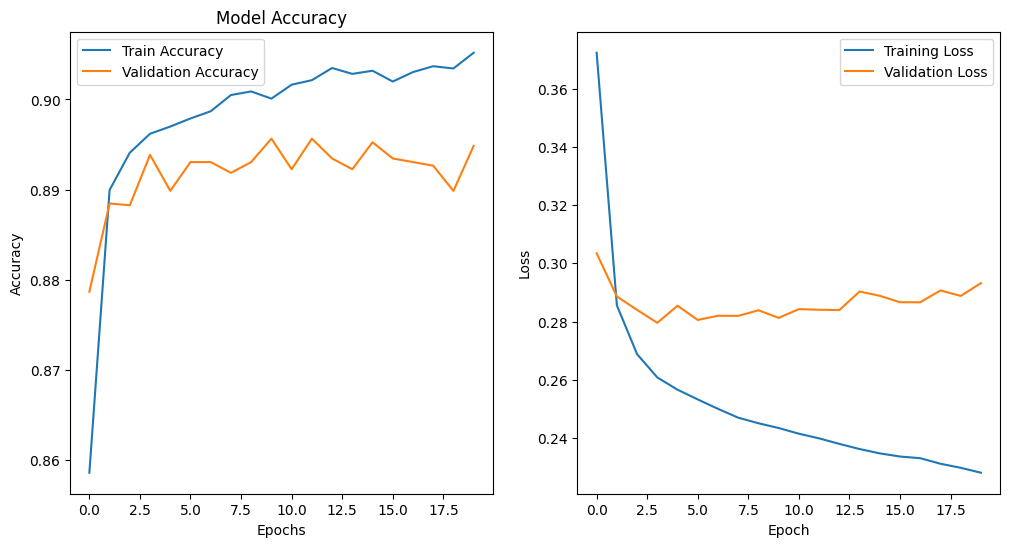

In [ ]:
import matplotlib.pyplot as plt

# Assuming that the model has been trained and the history object has been created
# history = model.fit(...)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The model seems to perform slighltly better with one more layer with better accuracy and AUC score. So we will keep this structure with 3 hidden layers.

In the next cell we will try tanh activation function.

In [ ]:
model_3 = Sequential([
    Dense(256, activation='tanh', input_shape=(395,)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Compile the model (Using SGD
model_3.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model_3
history_3 = model_3.fit(
    X_train_scaled, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

# Make predictions
y_pred = (model_3.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model_3
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8269 - loss: 0.4053 - val_accuracy: 0.8881 - val_loss: 0.2881
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8896 - loss: 0.2771 - val_accuracy: 0.8831 - val_loss: 0.2819
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8953 - loss: 0.2628 - val_accuracy: 0.8947 - val_loss: 0.2760
Epoch 4/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8932 - loss: 0.2678 - val_accuracy: 0.8949 - val_loss: 0.2750
Epoch 5/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8984 - loss: 0.2612 - val_accuracy: 0.8935 - val_loss: 0.2759
Epoch 6/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8952 - loss: 0.2651 - val_accuracy: 0.8925 - val_loss: 0.2755
Epoch 7/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8963 - loss: 0.2573 - val_accuracy: 0.8941 - val_loss: 0.2731
Epoch 8/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8933 - loss: 0.2620 - val_accuracy: 0.

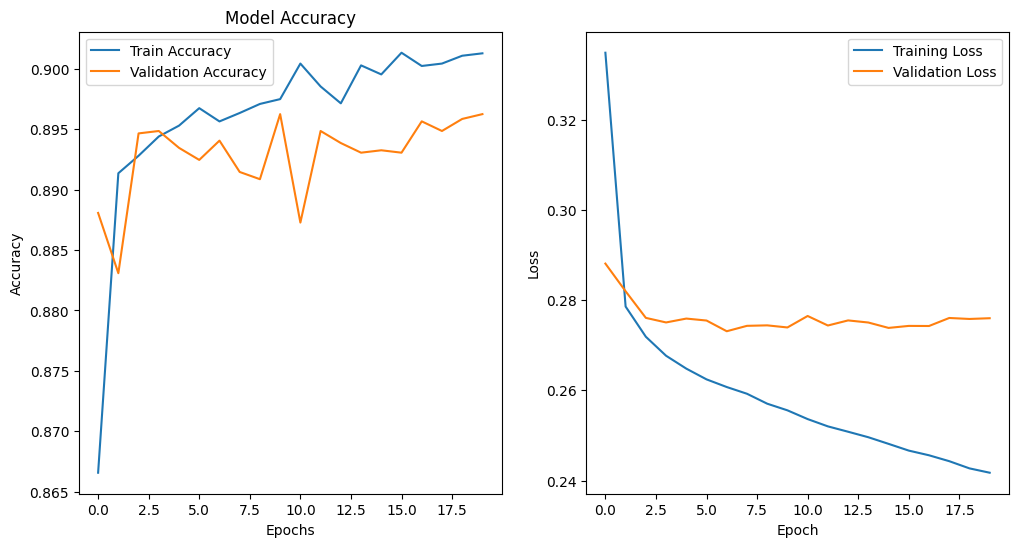

In [ ]:
import matplotlib.pyplot as plt

# Assuming that the model has been trained and the history object has been created
# history = model.fit(...)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Although using the tanh activation function in hidden layers led to a slight improvement in accuracy, the difference was not significant enough to justify switching from ReLU. Since ReLU is less prone to overfitting and is commonly used in deep networks, we will proceed with it to ensure a more stable and generalizable model. Moreover, the AUC score with ReLU was higher, indicating better overall classification performance across both classes.

 We will now proceed with a grid search to establish the best optimizer, batch size and number of epochs.

In [ ]:
##### We had to install a previous version of scikit-learn to perform grid search on neural networks
!pip install scikeras tensorflow keras scikit-learn
!pip install scikit-learn==1.4.2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to create the model
def create_model(optimizer='adam'):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
    # Define hyperparameters for grid search
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'batch_size': [16, 32, 64],  # Try different batch sizes
    'epochs': [10, 20, 30]  # Try different epoch values
}

# Wrap the model correctly
model = KerasClassifier(build_fn=create_model, verbose=0)  # FIXED

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

# Print results
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 64, 'epochs': 10, 'optimizer': 'sgd'}
Best Accuracy: 0.8756686972132425


(The previous output printed the best accuracy, but it was supposed to show the best AUC score. Since it is computationally expensive, I did not run it again.)

According to the previous grid search, keeping the neuronal architecture of model 2, the best performing model has 64 batch size, 10 epochs and the SGD optimizer.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
# Standardize features
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_4 = Sequential([
    Dense(256, activation='relu', input_shape=(395,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model (Using SGD
model_4.compile(
    optimizer=SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model_4
history_4 = model_4.fit(
    X_train_scaled, y_train,
    epochs=10, batch_size=64,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

# Make predictions
y_pred = (model_4.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model_4
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8377 - loss: 0.4606 - val_accuracy: 0.8759 - val_loss: 0.3278
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8846 - loss: 0.3146 - val_accuracy: 0.8835 - val_loss: 0.2973
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.2991 - val_accuracy: 0.8869 - val_loss: 0.2893
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8928 - loss: 0.2744 - val_accuracy: 0.8883 - val_loss: 0.2869
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8961 - loss: 0.2637 - val_accuracy: 0.8893 - val_loss: 0.2849
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8932 - loss: 0.2648 - val_accuracy: 0.8897 - val_loss: 0.2840
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8959 - loss: 0.2630 - val_accuracy: 0.8907 - val_loss: 0.2819
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9020 - loss: 0.2509 - val_accuracy: 0.8893 - val

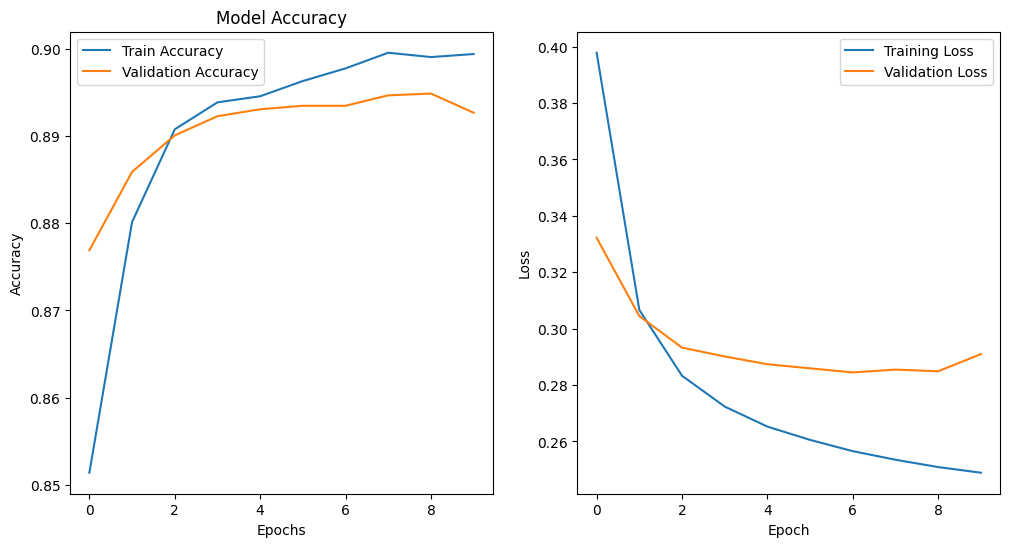

In [ ]:
import matplotlib.pyplot as plt

# Assuming that the model has been trained and the history object has been created
# history = model.fit(...)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_4.history['loss'], label='Training Loss')
plt.plot(history_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In the previous validation curves, we can see that the model starts to overfit around epoch 7. For Model 5, we introduced L1 and L2 regularization, as well as dropout, to mitigate overfitting.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks

# Define the model
model_5 = keras.Sequential([
    layers.Input(shape=(395,)),  # Input layer
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model_5
model_5.compile(optimizer=SGD(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model_5
history_5 = model_5.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=10,
                    batch_size=64,
                    verbose=1)


# Make predictions
y_pred = (model_5.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8371 - loss: 1.3169 - val_accuracy: 0.8502 - val_loss: 1.1929
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8579 - loss: 1.2000 - val_accuracy: 0.8663 - val_loss: 1.1576
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8565 - loss: 1.1695 - val_accuracy: 0.8813 - val_loss: 1.1397
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8687 - loss: 1.1551 - val_accuracy: 0.8849 - val_loss: 1.1295
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8722 - loss: 1.1396 - val_accuracy: 0.8869 - val_loss: 1.1196
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8832 - loss: 1.1229 - val_accuracy: 0.8903 - val_loss: 1.1115
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8809 - loss: 1.1114 - val_accuracy: 0.8877 - val_loss: 1.1062
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8836 - loss: 1.1112 - val_accuracy: 

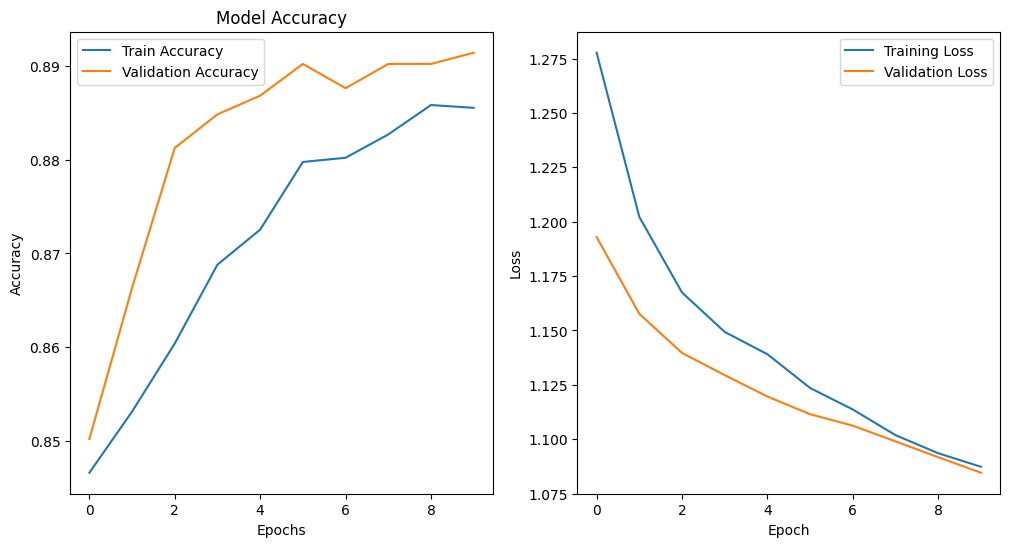

In [ ]:
import matplotlib.pyplot as plt

# Assuming that the model has been trained and the history object has been created
# history = model.fit(...)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_5.history['loss'], label='Training Loss')
plt.plot(history_5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can see in the previous loss curves that the regularizers mitigated overfitting although the auc score went down. Nonetheless, the performance is almost as good as before and the model is less prone to overfit.

In the next cell, we will try a less agressive dropout to check if the model performs better.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks

# Define the model
model_6 = keras.Sequential([
    layers.Input(shape=(395,)),  # Input layer
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)),
    layers.Dropout(0.1),  # Dropout to prevent overfitting
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)),
    layers.Dropout(0.1),  # Dropout to prevent overfitting
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_6.compile(optimizer=SGD(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Define early stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Stop if no improvement after 3 epochs
    restore_best_weights=True,  # Restore best model weights
    verbose=1
)

# Train the model with early stopping
history_6 = model_6.fit(X_train_scaled, y_train,
                         validation_data=(X_test_scaled, y_test),
                         epochs=10,
                         batch_size=64,
                         verbose=1,
                         callbacks=[early_stopping])  # Add early stopping callback

# Make predictions
y_pred = (model_6.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7788 - loss: 4.7165 - val_accuracy: 0.8502 - val_loss: 4.4652
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8495 - loss: 4.4387 - val_accuracy: 0.8715 - val_loss: 4.2793
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8684 - loss: 4.2528 - val_accuracy: 0.8813 - val_loss: 4.1305
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8793 - loss: 4.0970 - val_accuracy: 0.8869 - val_loss: 3.9937
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8814 - loss: 3.9620 - val_accuracy: 0.8869 - val_loss: 3.8618
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8914 - loss: 3.8208 - val_accuracy: 0.8895 - val_loss: 3.7345
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8924 - loss: 3.6885 - val_accuracy: 0.8917 - val_loss: 3.6094
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8926 - loss: 3.5649 - val_accuracy: 

The model's performance is slightly worse than before, so we will keep Model 5 as the best NN model, as it is less prone to overfitting while maintaining optimal results.

Stage 1 Conclusion:
XGBoost and NN models performed well on test and validation sets, achieving 89% accuracy. However, hyperparameter tuning did not yield significant improvements. Nevertheless, Model 5's regularization and dropout methods effectively prevented overfitting while maintaining similar performance, making it the best NN model.The tuned XGBoost outperformed the best neural network in AUC (88% vs. 75%), making it the best model overall.

# Stage 2 data

In [ ]:
# File URL
file_url_2 = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"

In [ ]:
df_2 = pd.read_csv(file_url_2)

In [ ]:
print(df_2.shape)
print(df_2.head())
df_2.info()
# Count the number of missing values in each column
missing_counts = df_2.isnull().sum()
print(missing_counts)

(25059, 18)
     CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nan

**Stage 2: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.



In [ ]:
# Start coding from here with Stage 2 dataset

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime

df_2["DateofBirth"] = pd.to_datetime(df_2["DateofBirth"], dayfirst=True)
df_2["Age"] = datetime.today().year - df_2["DateofBirth"].dt.year
df_2["Age"] = df_2["Age"].astype(int)  # Convert to integer
df_2.drop(columns=["DateofBirth"], inplace=True)


###  Remove Unnecessary Columns ###
df_2.drop(columns=["LearnerCode"], inplace=True)

### Remove High-Cardinality Columns ###
high_cardinality_cols = [col for col in df_2.select_dtypes(include=["object"]).columns
                         if df_2[col].nunique() > 200]
df_2.drop(columns=high_cardinality_cols, inplace=True)

### Remove Columns with > 50% Missing Data ###
missing_threshold = 0.5 * len(df_2)  # 50% of total rows around 12529.5 rows
df_2.dropna(thresh=missing_threshold, axis=1, inplace=True)

print(df_2.shape)
print(df_2.head())

(25059, 13)
     CentreName BookingType              LeadSource Gender Nationality  \
0  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
1  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
2  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
3  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
4  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   

              CourseLevel                                         CourseName  \
0             Pre-Masters                       Business and Law Pre-Masters   
1              Foundation   Life Sciences Undergraduate Foundation Programme   
2  International Year Two  Business Management and Finance International ...   
3  International Year Two  Business Management and Finance International ...   
4             Pre-Masters                       Business and Law Pre-Masters   

   IsFirstIntake CompletedCourse   ProgressionUniversity  \
0 

In [ ]:
#### check unique values for Course level
print(df_2["CourseLevel"].unique())

['Pre-Masters' 'Foundation' 'International Year Two'
 'International Year One']


In [ ]:
#### 'CompletedCourse' is the target#### change to integer values
df_2["CompletedCourse"] = df_2["CompletedCourse"].map({"Yes": 1, "No": 0})
### convert IsFirstIntake to integer
df_2["IsFirstIntake"] = df_2["IsFirstIntake"].astype(int)

###  Transform Course level to ordinal data and encode it ###
ordinal_features = ["CourseLevel"]
ordinal_mapping = {"Foundation": 1, "International Year One": 2,
                   "International Year Two": 3, "Pre-Masters": 4}
df_2["CourseLevel"] = df_2["CourseLevel"].map(ordinal_mapping)
###  Convert Gender to 0 (Male) and 1 (Female) ###
df_2["Gender"] = df_2["Gender"].map({"Male": 0, "Female": 1})

print(df_2.shape)
print(df_2.head())

(25059, 13)
     CentreName BookingType              LeadSource  Gender Nationality  \
0  ISC_Aberdeen       Agent  Standard Agent Booking       0     Chinese   
1  ISC_Aberdeen       Agent  Standard Agent Booking       0     Chinese   
2  ISC_Aberdeen       Agent  Standard Agent Booking       0     Chinese   
3  ISC_Aberdeen       Agent  Standard Agent Booking       0     Chinese   
4  ISC_Aberdeen       Agent  Standard Agent Booking       0     Chinese   

   CourseLevel                                         CourseName  \
0            4                       Business and Law Pre-Masters   
1            1   Life Sciences Undergraduate Foundation Programme   
2            3  Business Management and Finance International ...   
3            3  Business Management and Finance International ...   
4            4                       Business and Law Pre-Masters   

   IsFirstIntake  CompletedCourse   ProgressionUniversity  \
0              1                1  University of Aberdeen   


In [ ]:
### One-Hot Encoding for Remaining Categorical Features ### the new features are continuous
categorical_columns = df_2.select_dtypes(include=["object"]).columns
df_2 = pd.get_dummies(df_2, columns=categorical_columns)

# Display the transformed dataset shape
print(f"New shape: {df_2.shape}")
print(df_2.head())

New shape: (25059, 398)
   Gender  CourseLevel  IsFirstIntake  CompletedCourse  \
0       0            4              1                1   
1       0            1              0                1   
2       0            3              0                1   
3       0            3              1                1   
4       0            4              1                1   

   AuthorisedAbsenceCount  UnauthorisedAbsenceCount  Age  \
0                     NaN                       NaN   27   
1                    93.0                       5.0   27   
2                    92.0                       6.0   25   
3                    67.0                      15.0   26   
4                     NaN                       NaN   29   

   CentreName_ISC_Aberdeen  CentreName_ISC_Cardiff  CentreName_ISC_Dublin  \
0                     True                   False                  False   
1                     True                   False                  False   
2                     True         

Handle missing values in the new features replacing them with the median

In [ ]:
##handle missing values in the two new features
df_2['AuthorisedAbsenceCount'] = df_2['AuthorisedAbsenceCount'].fillna(df_2['AuthorisedAbsenceCount'].median())
df_2['UnauthorisedAbsenceCount'] = df_2['UnauthorisedAbsenceCount'].fillna(df_2['UnauthorisedAbsenceCount'].median())

In [ ]:
print(df_2.head())

   Gender  CourseLevel  IsFirstIntake  CompletedCourse  \
0       0            4              1                1   
1       0            1              0                1   
2       0            3              0                1   
3       0            3              1                1   
4       0            4              1                1   

   AuthorisedAbsenceCount  UnauthorisedAbsenceCount  Age  \
0                     1.0                      29.0   27   
1                    93.0                       5.0   27   
2                    92.0                       6.0   25   
3                    67.0                      15.0   26   
4                     1.0                      29.0   29   

   CentreName_ISC_Aberdeen  CentreName_ISC_Cardiff  CentreName_ISC_Dublin  \
0                     True                   False                  False   
1                     True                   False                  False   
2                     True                   False         

Check if the data is still imbalanced

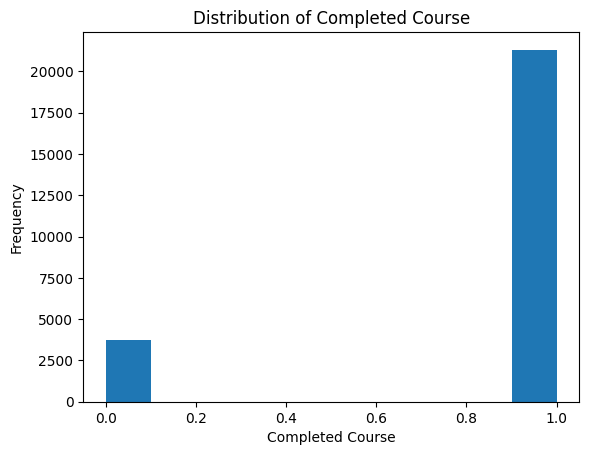

CompletedCourse
1    21305
0     3754
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
# Plot the histogram
plt.hist(df_2['CompletedCourse'])
plt.xlabel('Completed Course')
plt.ylabel('Frequency')
plt.title('Distribution of Completed Course')
plt.show()

## Count completed course values
print(df_2['CompletedCourse'].value_counts())

For this new dataset, we will use the simplest XGBoost and neural network models we previously employed, as they performed well on the previous dataset (default XGBoost and NN Model 2 from Stage 1). We will split the data into training, validation, and test sets. Since the target is imbalanced, we will prioritize the AUC score, as it provides a better evaluation of model performance across different threshold values and is less affected by class imbalance than accuracy. Then, we will perform a grid search for both XGBoost and neural network models to select the best model for each method. Once we have chosen the best neural network architecture, we will apply techniques such as dropout and regularization to prevent overfitting.

Split the data

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score



# Define features and target
X = df_2.drop(columns=["CompletedCourse"])  # Features
y = df_2["CompletedCourse"]  # Target (Binary: 1 = Completed, 0 = Dropped Out)
X = X.astype(int)  # Converts all boolean columns to 0/1 integers so that the neural network will be able to handle the data set ### the new features count the absence so it is okay to convert them to integers

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Performing default xgboost

XGBoost Model Accuracy: 0.9054269752593775

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65       751
           1       0.93      0.96      0.95      4261

    accuracy                           0.91      5012
   macro avg       0.83      0.77      0.80      5012
weighted avg       0.90      0.91      0.90      5012

Accuracy: 0.9054
Confusion Matrix:
[[ 442  309]
 [ 165 4096]]
Precision: 0.9299
Recall: 0.9613
ROC-AUC Score: 0.9112


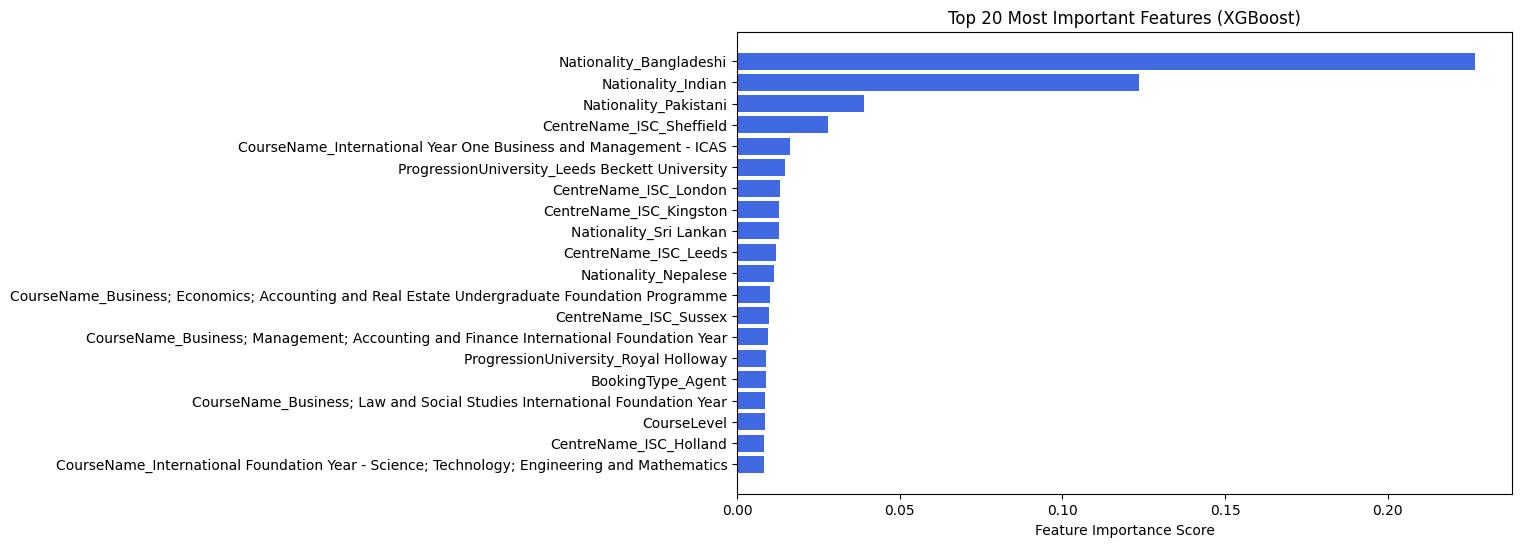

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
seed = 42
# Initialize XGBoost with default parameters
xg_model = xgb.XGBClassifier(random_state=seed)  # Add seed for reproducibility

# Train the model
xg_model.fit(X_train, y_train)

# Predictions
predictions = xg_model.predict(X_test)
# Make predictions
y_pred = xg_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)[:, 1]  # Get probability for ROC-AUC

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Model evaluation
print("XGBoost Model Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Feature Importance Analysis
import matplotlib.pyplot as plt

feature_importances = xg_model.feature_importances_
sorted_idx_1 = feature_importances.argsort()[-20:]  # Top 20 most important features

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx_1], feature_importances[sorted_idx_1], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.title("Top 20 Most Important Features (XGBoost)")
plt.show()

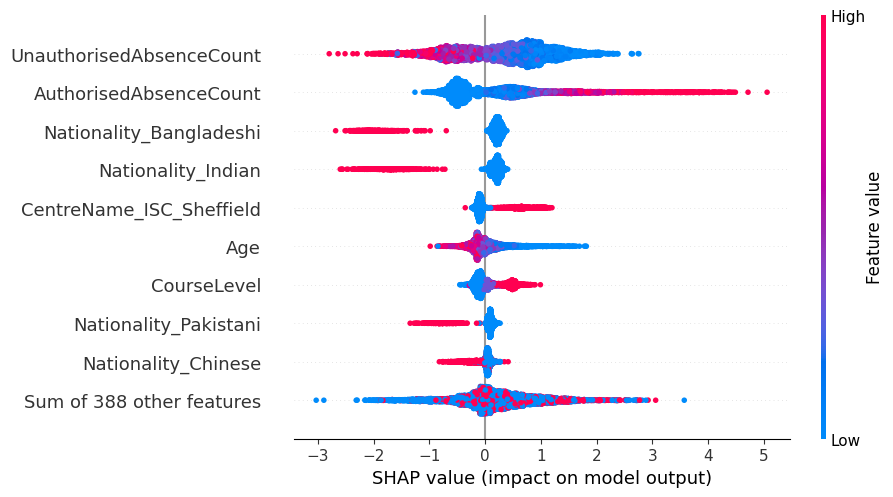

In [ ]:
import shap
import matplotlib.pyplot as plt
shap_ex = shap.TreeExplainer(xg_model)
vals = shap_ex(X_test)
shap.plots.beeswarm(vals)

The beeswarm feature importance plot revealed that the new features had the highest importance, explaining the improved model performance.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9058
Confusion Matrix:
[[ 438  313]
 [ 159 4102]]
Precision: 0.9291
Recall: 0.9627
ROC-AUC Score: 0.9113


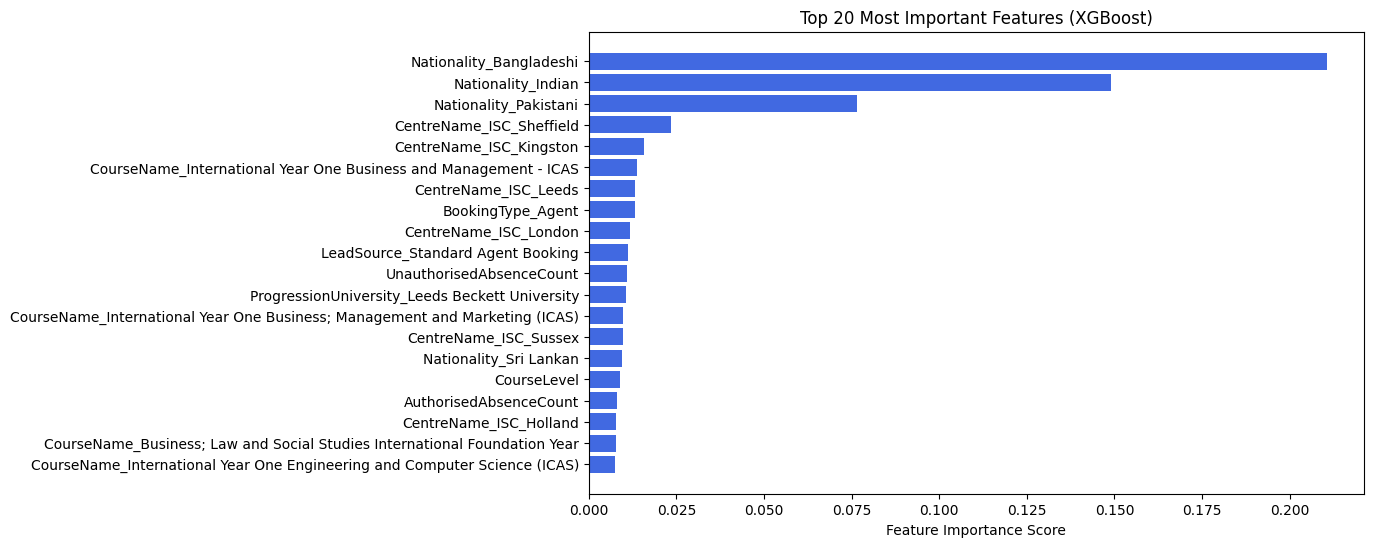

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,      # Number of trees
    learning_rate=0.05,    # Step size shrinkage
    max_depth=6,           # Depth of each tree
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"  # Since it's binary classification
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get probability for ROC-AUC

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Feature Importance Analysis
import matplotlib.pyplot as plt

feature_importances = xgb_model.feature_importances_
sorted_idx = feature_importances.argsort()[-20:]  # Top 20 most important features

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.title("Top 20 Most Important Features (XGBoost)")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score

# Define hyperparameter grid (3 values per parameter)
param_grid = {
    "n_estimators": [100, 200, 300],        # Number of trees
    "learning_rate": [0.01, 0.05, 0.1],     # Step size
    "max_depth": [3, 4, 6, 8],                 # Tree depth
}

# Create Grid Search
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    param_grid=param_grid,
    scoring="roc_auc",  # Optimize for AUC
    cv=3,               # 3-fold cross-validation
    verbose=2,
    n_jobs=-1           # Use all CPU cores
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:43:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}
Accuracy: 0.9062
ROC-AUC Score: 0.9118
Precision: 0.9299
Recall: 0.9622
Confusion Matrix:
[[ 442  309]
 [ 161 4100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       751
           1       0.93      0.96      0.95      4261

    accuracy                           0.91      5012
   macro avg       0.83      0.78      0.80      5012
weighted avg       0.90      0.91      0.90      5012



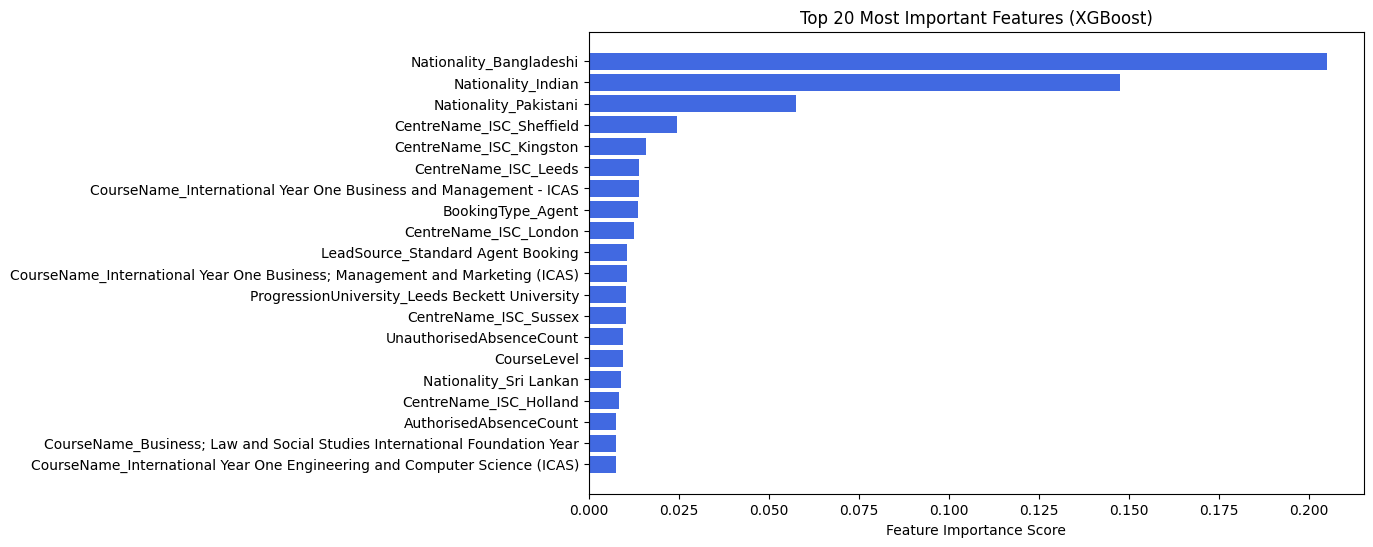

In [ ]:
# Feature Importance Analysis
import matplotlib.pyplot as plt

feature_importances = best_model.feature_importances_
sorted_idx_best = feature_importances.argsort()[-20:]  # Top 20 most important features

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx_best], feature_importances[sorted_idx_best], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.title("Top 20 Most Important Features (XGBoost)")
plt.show()

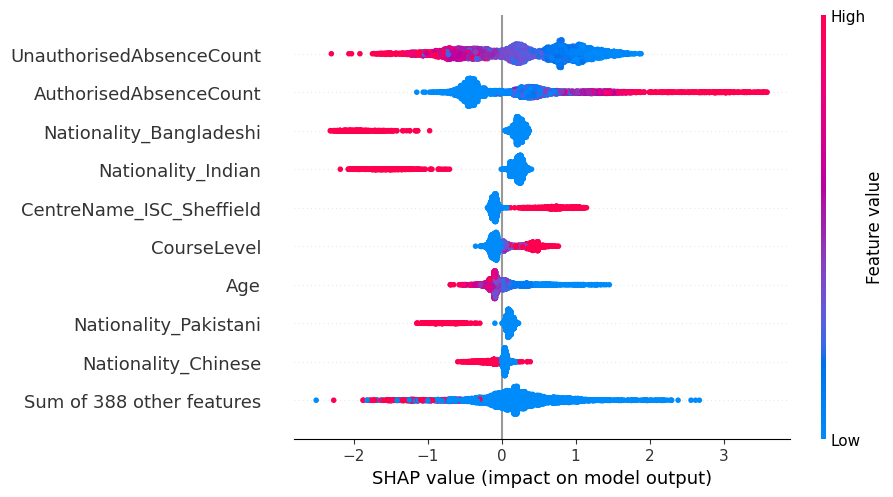

In [ ]:
import shap
import matplotlib.pyplot as plt
shap_ex = shap.TreeExplainer(best_model)
vals = shap_ex(X_test)
shap.plots.beeswarm(vals)

The beeswarm feature importance plot revealed that the new features had the highest importance, explaining the improved model performance.

In [ ]:
print(X.shape)

(25059, 397)


In [ ]:
!pip install scikeras tensorflow keras scikit-learn
!pip install scikit-learn==1.4.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


I had to use a previous version of sckit-learn to perform gridsearch.

In [ ]:
!pip install scikit-learn==1.4.2


Neural network for stage 2:
First we will try the best model of the previous stage(model 2) regarding accuracy and AUC score.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(397,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model (Using SGD
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8445 - loss: 0.4246 - val_accuracy: 0.8843 - val_loss: 0.2955
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8910 - loss: 0.2810 - val_accuracy: 0.8915 - val_loss: 0.2776
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8997 - loss: 0.2498 - val_accuracy: 0.8962 - val_loss: 0.2700
Epoch 4/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9005 - loss: 0.2482 - val_accuracy: 0.8974 - val_loss: 0.2679
Epoch 5/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9040 - loss: 0.2354 - val_accuracy: 0.8988 - val_loss: 0.2703
Epoch 6/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9082 - loss: 0.2326 - val_accuracy: 0.9006 - val_loss: 0.2652
Epoch 7/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9100 - loss: 0.2262 - val_accuracy: 0.8990 - val_loss: 0.2629
Epoch 8/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9046 - loss: 0.2281 - val_accuracy: 0.

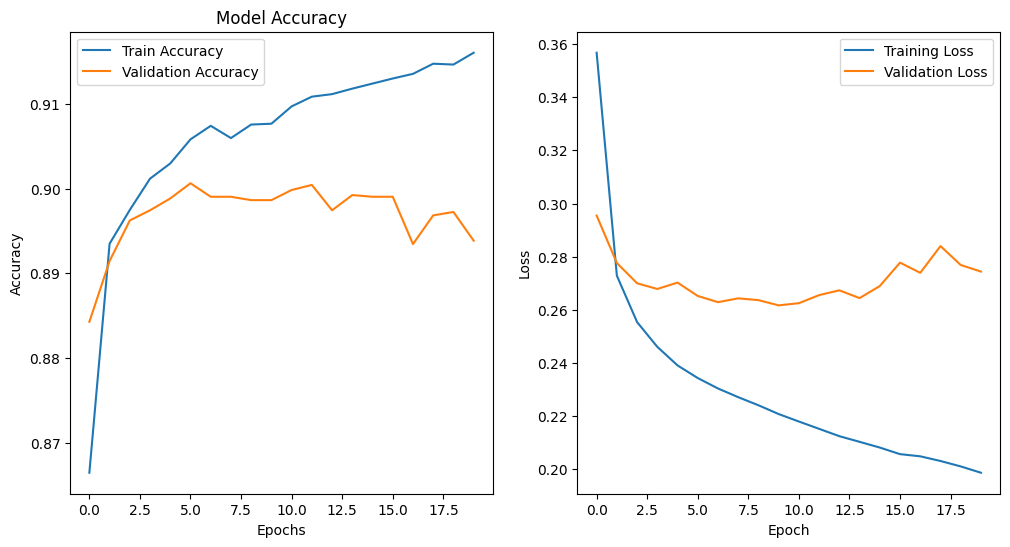

In [ ]:
import matplotlib.pyplot as plt

# Assuming that the model has been trained and the history object has been created
# history = model.fit(...)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to create the model
def create_model(optimizer='adam'):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
    # Define hyperparameters for grid search
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'batch_size': [16, 32, 64],  # Try different batch sizes
    'epochs': [10, 20, 30]  # Try different epoch values
}

# Wrap the model correctly
model = KerasClassifier(build_fn=create_model, verbose=0)  # FIXED

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

# Print results
print("Best Parameters:", grid_result.best_params_)
print("Best AUC score", grid_result.best_score_)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 64, 'epochs': 10, 'optimizer': 'rmsprop'}
Best AUC score 0.9055708738088469


In [ ]:
from tensorflow.keras.optimizers import RMSprop
# Build the neural network
model_2 = Sequential([
    Dense(256, activation='relu', input_shape=(397,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model_2 (Using SGD
model_2.compile(
    optimizer=RMSprop(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model_2
history_2 = model_2.fit(
    X_train_scaled, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

# Make predictions
y_pred = (model_2.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model_2
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8851 - loss: 0.2995 - val_accuracy: 0.8861 - val_loss: 0.2843
Epoch 2/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8982 - loss: 0.2539 - val_accuracy: 0.9010 - val_loss: 0.2691
Epoch 3/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9035 - loss: 0.2515 - val_accuracy: 0.8978 - val_loss: 0.2645
Epoch 4/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9017 - loss: 0.2543 - val_accuracy: 0.8992 - val_loss: 0.2610
Epoch 5/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9011 - loss: 0.2534 - val_accuracy: 0.9000 - val_loss: 0.2640
Epoch 6/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9038 - loss: 0.2477 - val_accuracy: 0.8982 - val_loss: 0.2620
Epoch 7/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9042 - loss: 0.2440 - val_accuracy: 0.8992 - val_loss: 0.2727
Epoch 8/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9049 - loss: 0.2431 - val_accuracy: 0.

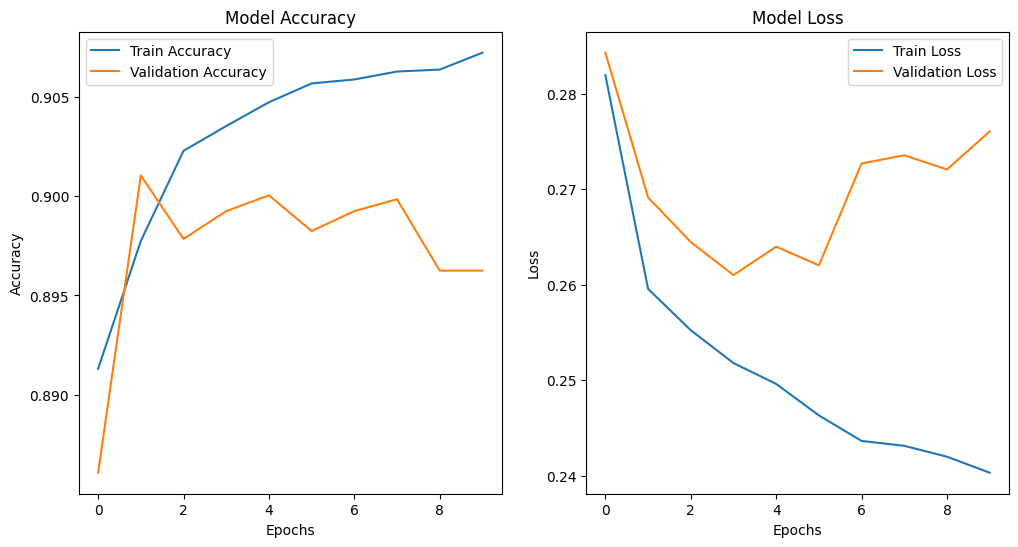

In [ ]:
import matplotlib.pyplot as plt
# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The model seems to be overftting since the loss validation curve. In the next model we will implement l1/l2 regularizers and dropout to prevent overfitting.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from keras.optimizers import RMSprop, Adam
# Define the model
model_3 = keras.Sequential([
    layers.Input(shape=(397,)),  # Input layer,
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model_3
model_3.compile(optimizer=RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])



# Train the model_3
history_3 = model_3.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=10,
                    batch_size=64)


# Make predictions
y_pred = (model_3.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8723 - loss: 1.0038 - val_accuracy: 0.8966 - val_loss: 0.5857
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8980 - loss: 0.5394 - val_accuracy: 0.8939 - val_loss: 0.4403
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8987 - loss: 0.4129 - val_accuracy: 0.8962 - val_loss: 0.3829
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9002 - loss: 0.3595 - val_accuracy: 0.8960 - val_loss: 0.3697
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9002 - loss: 0.3543 - val_accuracy: 0.8935 - val_loss: 0.3582
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8994 - loss: 0.3435 - val_accuracy: 0.8941 - val_loss: 0.3440
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9029 - loss: 0.3346 - val_accuracy: 0.8933 - val_loss: 0.3425
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8996 - loss: 0.3380 - val_accuracy: 0

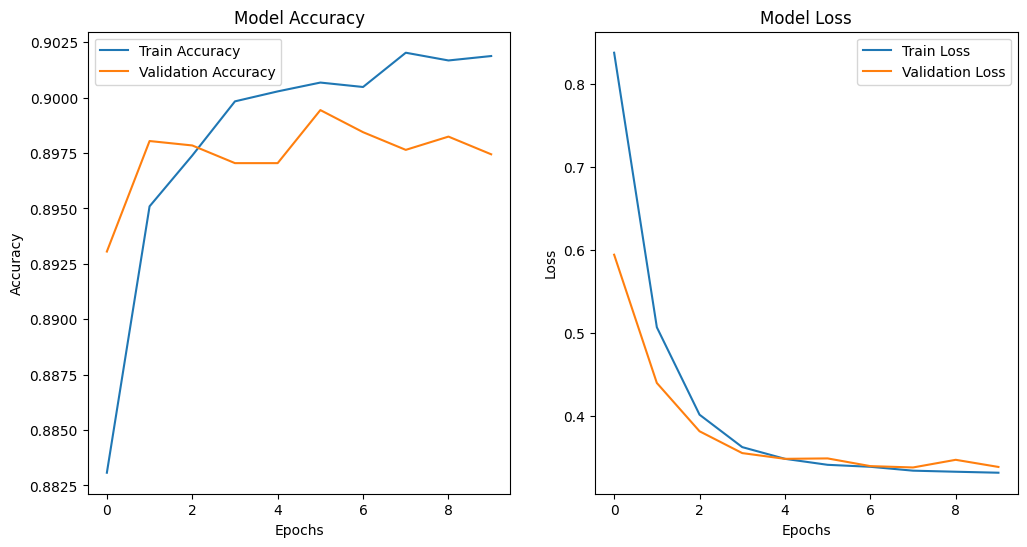

In [ ]:
import matplotlib.pyplot as plt
# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see in the previous figures that dropout and regularizers prevented overfitting and outputted smoother curves.

Stage 2 conclusion:

NN Model 3 introduced L1/L2 regularization and dropout, effectively reducing overfitting while maintaining performance.

The improvements from hyperparameter tuning in XGBoost and NN models were not significant. However, the additional information provided by the two new features, "UnauthorisedAbsenceCount" and "AuthorisedAbsenceCount," allowed the models to achieve over 90% accuracy. The beeswarm feature importance plot revealed that the new features had the highest importance, explaining the improved model performance.


# Stage 3 data

In [ ]:
# File URL
file_url_3 = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"

In [ ]:
# Start coding from here with Stage 1 dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import xgboost as xgb
import seaborn as sns

In [ ]:
df_3 = pd.read_csv(file_url_3)
print(df_3.shape)
print(df_3.head())
df_3.info()
# Count the number of missing values in each column
missing_counts = df_3.isnull().sum()
print(missing_counts)
df_3.shape

(25059, 21)
     CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ...  \
0                 Nanjing  ...   
1     

(25059, 21)

**Stage 3: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with rows that have missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.






In [ ]:
# Start coding from here with Stage 3 dataset


import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime

df_3["DateofBirth"] = pd.to_datetime(df_3["DateofBirth"], dayfirst=True)
df_3["Age"] = datetime.today().year - df_3["DateofBirth"].dt.year
df_3["Age"] = df_3["Age"].astype(int)  # Convert to integer
df_3.drop(columns=["DateofBirth"], inplace=True)


###  Remove Unnecessary Columns ###
df_3.drop(columns=["LearnerCode"], inplace=True)

### Remove High-Cardinality Columns ###
high_cardinality_cols = [col for col in df_3.select_dtypes(include=["object"]).columns
                         if df_3[col].nunique() > 200]
df_3.drop(columns=high_cardinality_cols, inplace=True)

### Remove Columns with > 50% Missing Data ###
missing_threshold = 0.5 * len(df_3)  # 50% of total rows around 12529.5 rows
df_3.dropna(thresh=missing_threshold, axis=1, inplace=True)

print(df_3.shape)
print(df_3.head())

(25059, 16)
     CentreName BookingType              LeadSource Gender Nationality  \
0  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
1  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
2  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
3  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
4  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   

              CourseLevel                                         CourseName  \
0             Pre-Masters                       Business and Law Pre-Masters   
1              Foundation   Life Sciences Undergraduate Foundation Programme   
2  International Year Two  Business Management and Finance International ...   
3  International Year Two  Business Management and Finance International ...   
4             Pre-Masters                       Business and Law Pre-Masters   

   IsFirstIntake CompletedCourse  AssessedModules  PassedModul

In [ ]:
#### 'CompletedCourse' is the target#### change to integer values
df_3["CompletedCourse"] = df_3["CompletedCourse"].map({"Yes": 1, "No": 0})
### One-Hot Encoding for Remaining Categorical Features ### the new features are continuous
categorical_columns = df_3.select_dtypes(include=["object"]).columns
df_3 = pd.get_dummies(df_3, columns=categorical_columns)

# Display the transformed dataset shape
print(f"New shape: {df_3.shape}")
print(df_3.head())



New shape: (25059, 405)
   IsFirstIntake  CompletedCourse  AssessedModules  PassedModules  \
0           True                1              4.0            4.0   
1          False                1              7.0            7.0   
2          False                1              8.0            8.0   
3           True                1              8.0            8.0   
4           True                1              4.0            4.0   

   FailedModules  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  Age  \
0            0.0                     NaN                       NaN   27   
1            0.0                    93.0                       5.0   27   
2            0.0                    92.0                       6.0   25   
3            0.0                    67.0                      15.0   26   
4            0.0                     NaN                       NaN   29   

   CentreName_ISC_Aberdeen  CentreName_ISC_Cardiff  ...  \
0                     True                   False 

In [ ]:
##handle missing values in the five new features replacing them with the median
df_3['AuthorisedAbsenceCount'] = df_3['AuthorisedAbsenceCount'].fillna(df_3['AuthorisedAbsenceCount'].median())
df_3['UnauthorisedAbsenceCount'] = df_3['UnauthorisedAbsenceCount'].fillna(df_3['UnauthorisedAbsenceCount'].median())
df_3['AssessedModules'] = df_3['AssessedModules'].fillna(df_3['AssessedModules'].median())
df_3['PassedModules'] = df_3['PassedModules'].fillna(df_3['PassedModules'].median())
df_3['FailedModules'] = df_3['FailedModules'].fillna(df_3['FailedModules'].median())

In [ ]:
print(df_3.head())

   IsFirstIntake  CompletedCourse  AssessedModules  PassedModules  \
0           True                1              4.0            4.0   
1          False                1              7.0            7.0   
2          False                1              8.0            8.0   
3           True                1              8.0            8.0   
4           True                1              4.0            4.0   

   FailedModules  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  Age  \
0            0.0                     1.0                      29.0   27   
1            0.0                    93.0                       5.0   27   
2            0.0                    92.0                       6.0   25   
3            0.0                    67.0                      15.0   26   
4            0.0                     1.0                      29.0   29   

   CentreName_ISC_Aberdeen  CentreName_ISC_Cardiff  ...  \
0                     True                   False  ...   
1               

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score



# Define features and target
X = df_3.drop(columns=["CompletedCourse"])
y = df_3["CompletedCourse"]  # Target (Binary: 1 = Completed, 0 = Dropped Out)
X = X.astype(int)  # Converts all boolean columns to 0/1 integers so that the neural network will be able to handle the data set ### the new features are integers

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Performing simple xg boost before grid search

XGBoost Model Accuracy: 0.9748603351955307

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       751
           1       0.98      0.99      0.99      4261

    accuracy                           0.97      5012
   macro avg       0.96      0.94      0.95      5012
weighted avg       0.97      0.97      0.97      5012

Accuracy: 0.9749
Confusion Matrix:
[[ 671   80]
 [  46 4215]]
Precision: 0.9814
Recall: 0.9892
ROC-AUC Score: 0.9933


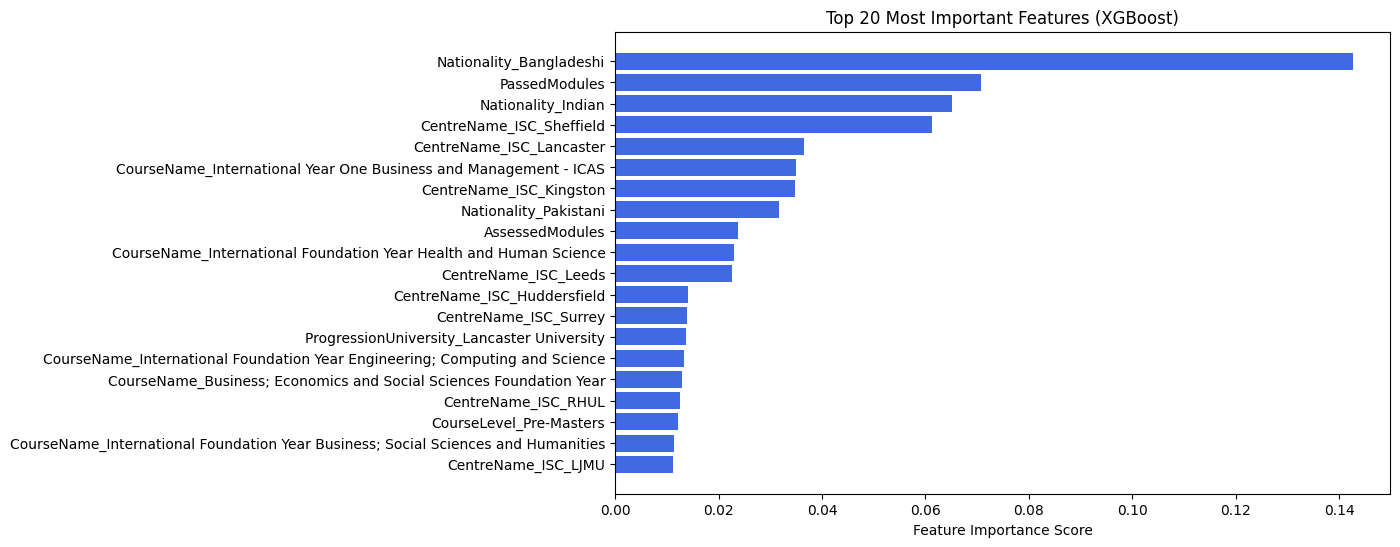

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
seed = 42
# Initialize XGBoost with default parameters
xg_model = xgb.XGBClassifier(random_state=seed)  # Add seed for reproducibility

# Train the model
xg_model.fit(X_train, y_train)

# Predictions
predictions = xg_model.predict(X_test)
# Make predictions
y_pred = xg_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)[:, 1]  # Get probability for ROC-AUC

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Model evaluation
print("XGBoost Model Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Feature Importance Analysis
import matplotlib.pyplot as plt

feature_importances = xg_model.feature_importances_
sorted_idx_1 = feature_importances.argsort()[-20:]  # Top 20 most important features

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx_1], feature_importances[sorted_idx_1], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.title("Top 20 Most Important Features (XGBoost)")
plt.show()

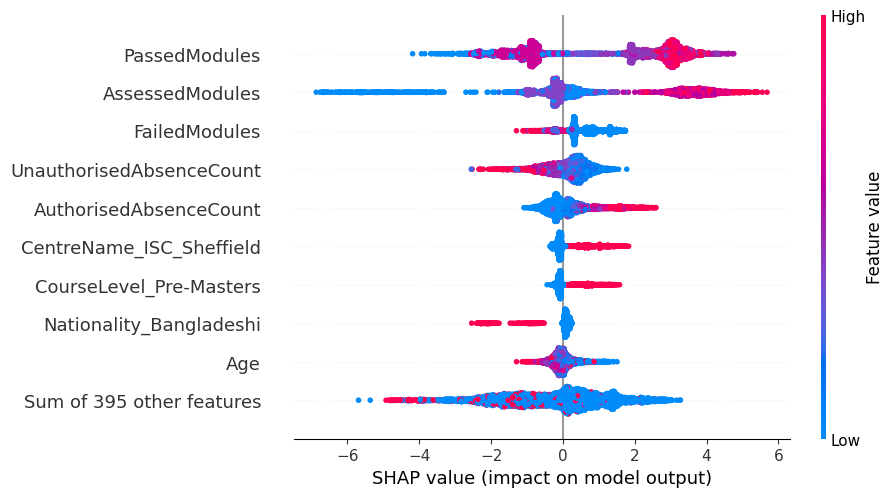

In [ ]:
import shap
import matplotlib.pyplot as plt
shap_ex = shap.TreeExplainer(xg_model)
vals = shap_ex(X_test)
shap.plots.beeswarm(vals)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score

# Define hyperparameter grid (at least 3 values per parameter)
param_grid = {
    "n_estimators": [100, 200, 300],        # Number of trees
    "learning_rate": [0.01, 0.05, 0.1],     # Step size
    "max_depth": [3, 4, 6, 8],                 # Tree depth
}

# Create Grid Search
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    param_grid=param_grid,
    scoring="roc_auc",  # Optimize for AUC
    cv=3,               # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:02:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}
Accuracy: 0.9771
ROC-AUC Score: 0.9930
Precision: 0.9834
Recall: 0.9897
Confusion Matrix:
[[ 680   71]
 [  44 4217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       751
           1       0.98      0.99      0.99      4261

    accuracy                           0.98      5012
   macro avg       0.96      0.95      0.95      5012
weighted avg       0.98      0.98      0.98      5012



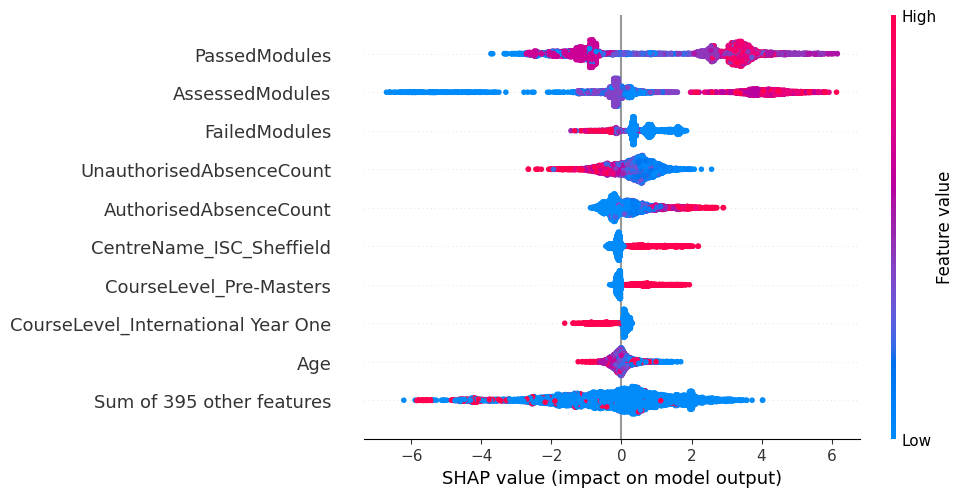

In [ ]:
import shap
import matplotlib.pyplot as plt
shap_ex = shap.TreeExplainer(best_model)
vals = shap_ex(X_test)
shap.plots.beeswarm(vals)

The beeswarm SHAP PLOT for stage 3 shows that the newly introduced features have the highest importance and explain why the models peroformances are way higher in stage 3. The regular feature importance barplot only displays absolute importance, while the SHAP plot highlights whether a feature increases or decreases the predicted outcome. This explains why the new features appear lower in the regular plot.

Neural Networks Stage 3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(404,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model (Using SGD
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8515 - loss: 0.4138 - val_accuracy: 0.8907 - val_loss: 0.2788
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8965 - loss: 0.2476 - val_accuracy: 0.8994 - val_loss: 0.2534
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9081 - loss: 0.2251 - val_accuracy: 0.9044 - val_loss: 0.2426
Epoch 4/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9200 - loss: 0.2041 - val_accuracy: 0.9156 - val_loss: 0.2287
Epoch 5/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9252 - loss: 0.1883 - val_accuracy: 0.9162 - val_loss: 0.2242
Epoch 6/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9259 - loss: 0.1827 - val_accuracy: 0.9216 - val_loss: 0.2168
Epoch 7/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9307 - loss: 0.1756 - val_accuracy: 0.9282 - val_loss: 0.2136
Epoch 8/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9364 - loss: 0.1612 - val_accuracy: 0

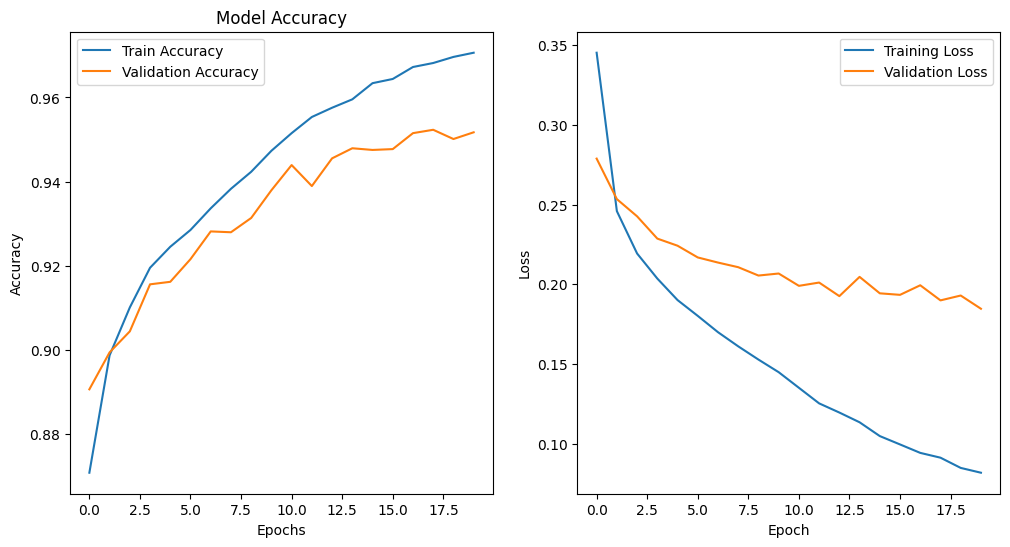

In [ ]:
import matplotlib.pyplot as plt

# Assuming that the model has been trained and the history object has been created
# history = model.fit(...)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to create the model
def create_model(optimizer='adam'):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
    # Define hyperparameters for grid search
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'batch_size': [16, 32, 64],  # Try different batch sizes
    'epochs': [10, 20]  # Try different epoch values
}

# Wrap the model correctly
model = KerasClassifier(build_fn=create_model, verbose=0)  # FIXED

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

# Print results
print("Best Parameters:", grid_result.best_params_)
print("Best AUC score", grid_result.best_score_)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 64, 'epochs': 10, 'optimizer': 'adam'}
Best AUC score 0.9759766261635625


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
# Build the neural network
model_2 = Sequential([
    Dense(256, activation='relu', input_shape=(404,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Compile the model (Using SGD
model_2.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_2 = model.fit(
    X_train_scaled, y_train,
    epochs=10, batch_size=64,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8835 - loss: 0.2958 - val_accuracy: 0.9324 - val_loss: 0.1962
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9384 - loss: 0.1633 - val_accuracy: 0.9523 - val_loss: 0.1424
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9617 - loss: 0.1050 - val_accuracy: 0.9601 - val_loss: 0.1161
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9676 - loss: 0.0826 - val_accuracy: 0.9567 - val_loss: 0.1301
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9711 - loss: 0.0763 - val_accuracy: 0.9665 - val_loss: 0.1087
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9735 - loss: 0.0703 - val_accuracy: 0.9613 - val_loss: 0.1105
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9753 - loss: 0.0632 - val_accuracy: 0.9649 - val_loss: 0.1110
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9764 - loss: 0.0601 - val_accuracy: 

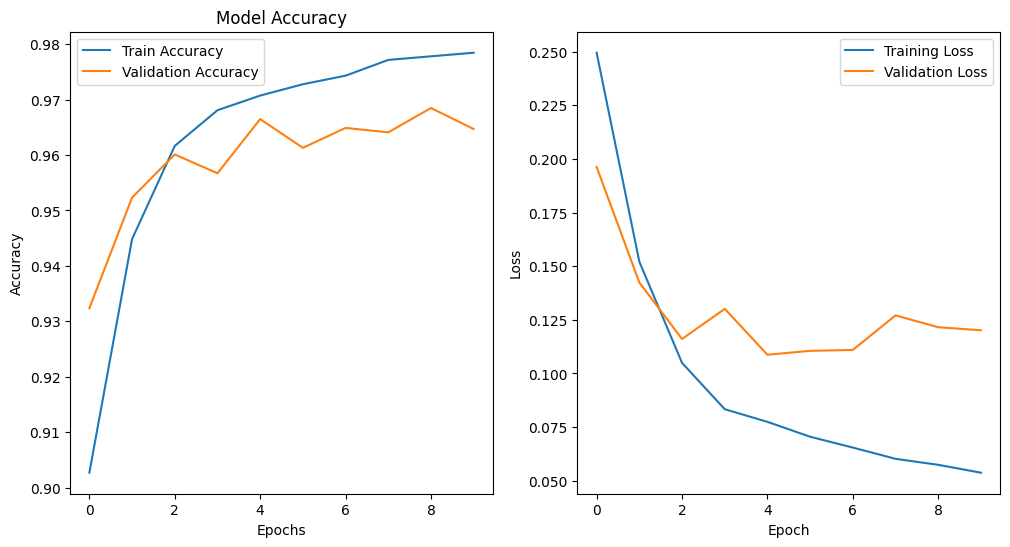

In [ ]:
import matplotlib.pyplot as plt

# Assuming that the model has been trained and the history object has been created
# history = model.fit(...)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_2.history_['accuracy'], label='Train Accuracy')
plt.plot(history_2.history_['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history_['loss'], label='Training Loss')
plt.plot(history_2.history_['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from keras.optimizers import RMSprop, Adam# Define the model
model_3 = keras.Sequential([
    layers.Input(shape=(404,)),  # Input layer
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model_3
model_3.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])



# Train the model_3
history_3 = model_3.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=10,
                    batch_size=64)
# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8562 - loss: 0.6545 - val_accuracy: 0.9120 - val_loss: 0.4325
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9141 - loss: 0.4203 - val_accuracy: 0.9256 - val_loss: 0.3710
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9277 - loss: 0.3507 - val_accuracy: 0.9485 - val_loss: 0.3065
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9511 - loss: 0.2881 - val_accuracy: 0.9555 - val_loss: 0.2650
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9590 - loss: 0.2515 - val_accuracy: 0.9617 - val_loss: 0.2363
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9648 - loss: 0.2195 - val_accuracy: 0.9673 - val_loss: 0.2102
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9675 - loss: 0.1959 - val_accuracy: 0.9665 - val_loss: 0.1911
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9686 - loss: 0.1802 - val_accuracy: 0.

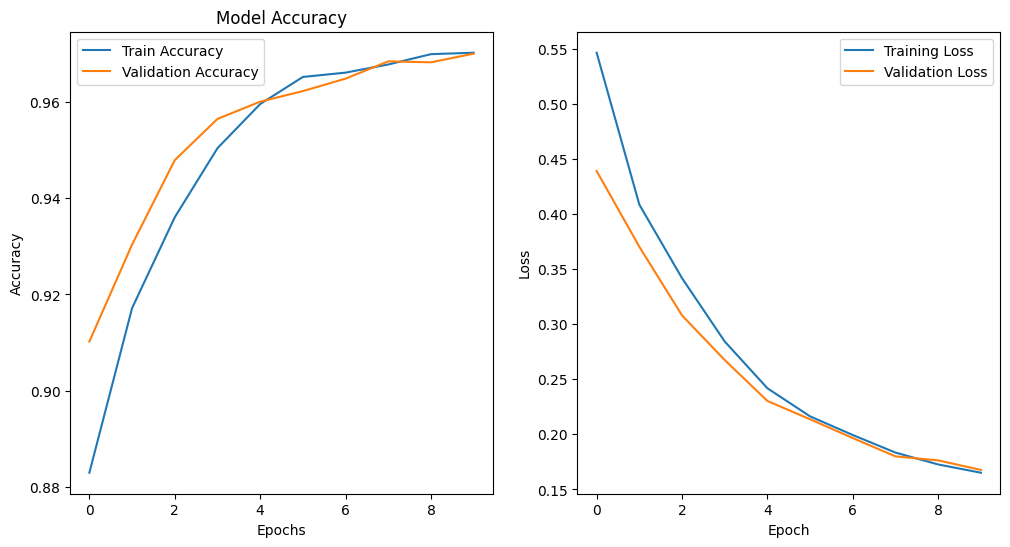

In [ ]:
import matplotlib.pyplot as plt

# Assuming that the model has been trained and the history object has been created
# history = model.fit(...)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Once again, regularization and dropout methods have mitigated overfitting, resulting in smoother validation loss curves in NN Model 3 for Stage 3 while maintaining similar performance. Because of this, NN Model 3 for Stage 3 is expected to generalize better to new data.

Stage 3 Conclusion:

Hyperparameter tuning had no significant impact on performance, but the inclusion of three new student performance features significantly improved results. XGBoost achieved 98% accuracy and an AUC of 99%, while the neural network models reached 96% accuracy and an AUC of 92%.

Conclusion: Our results emphasize the importance of data quality in improving model performance. While hyperparameter tuning had no significant impact, adding relevant features significantly enhanced accuracy and AUC scores. L1 and L2 regularization effectively mitigated overfitting in neural network models, improving generalization. Additionally, XGBoost consistently achieved the best performance across all three stages. Future improvements could involve expanding the grid search, addressing class imbalance, or applying feature selection techniques to refine model efficiency.

# Declaration
By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the **Cambridge plagiarism regulations**.
